In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('goog.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400
60,3/17/2017,851.609985,853.400024,847.109985,852.119995,1712300


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,814.005573,817.755576,809.734066,814.561804,1.361269e+06
std,18.784303,18.556004,19.384799,19.265955,4.987376e+05
min,778.809998,782.780029,770.409973,771.820007,6.234000e+05
25%,799.679993,802.700012,793.270020,801.340027,1.057900e+06
50%,809.510010,815.250000,804.539978,809.559998,1.247700e+06
75%,828.659973,833.250000,825.059998,830.630005,1.494500e+06
max,851.609985,853.400024,847.109985,852.119995,3.228900e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    61 non-null     object 
 1   Open    61 non-null     float64
 2   High    61 non-null     float64
 3   Low     61 non-null     float64
 4   Close   61 non-null     float64
 5   Volume  61 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 3.0+ KB


In [7]:
df.shape

(61, 6)

In [8]:
df.size

366

In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

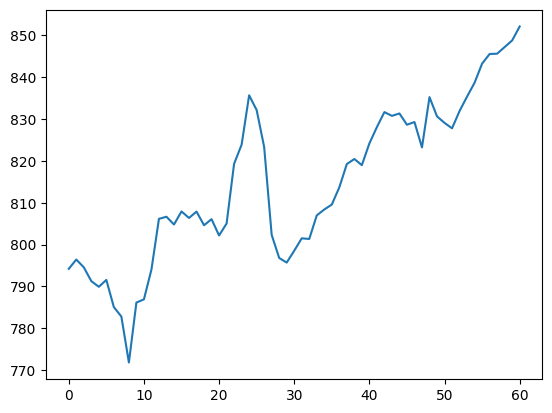

In [10]:
plt.plot(df['Close'])

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [12]:
train_data = df_normalized[:int(len(df_normalized)*0.8)]
test_data = df_normalized[int(len(df_normalized)*0.8):]

In [13]:
len(train_data),len(test_data)

(48, 13)

In [14]:
def createdataset(data,step=4):
  x=[]
  y=[]
  for i in range(len(data)-step):
    x.append(data[i:i+1,0])
    y.append(data[i+1,0])


  return np.array(x),np.array(y)

In [15]:
x_train,y_train = createdataset(train_data)
x_test,y_test = createdataset(test_data)

In [16]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

2025-05-03 16:00:41.258068: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 16:00:41.508134: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-03 16:00:41.623348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746288041.913950    4542 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746288041.983549    4542 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746288042.630104    4542 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
model.summary()

2025-05-03 16:00:46.791406: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(x_train,y_train,epochs=50,batch_size=4)

Epoch 1/50


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2145 - mae: 0.4135
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1672 - mae: 0.3791 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1190 - mae: 0.2994 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0766 - mae: 0.2285 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0350 - mae: 0.1407 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 - mae: 0.1095 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mae: 0.1071 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0175 - mae: 0.1147 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0196 - mae: 0.1078 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 - mae: 0.0970 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - mae: 0.0798     
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 - mae: 0.0918 
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [19]:

y_pred = model.predict(x_test)
y_pred =scaler.inverse_transform(y_pred)
y_test =scaler.inverse_transform(y_test.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('MSE:',mse)
print('MAE:',mae)
print('RMSE:',rmse)

MSE: 9.5272739513446
MAE: 2.73406309548611
RMSE: 3.086628249618765


[]

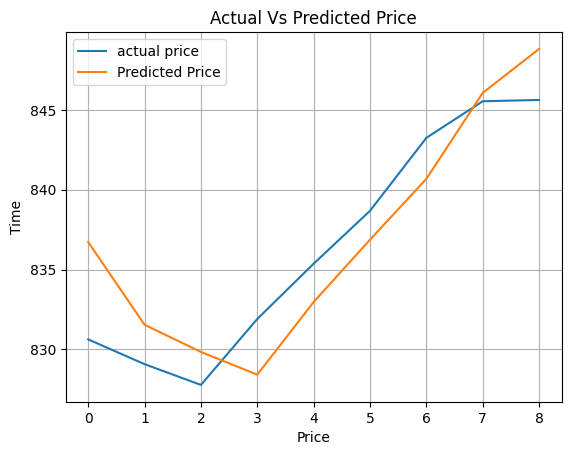

In [21]:
plt.plot(y_test,label='actual price')
plt.plot(y_pred,label='Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Time')
plt.legend()
plt.grid(True)
plt.plot()
